# Purpose
* gather appropriate negative class dataset for aki admission
* 1 day - 5 day data saved in diffrent files
    * Correction: negative class will be collected from 2 to 5 days
* the goal is to merge the lab and vital datasets without duplicating patients
* Note, the intake output data is incomplete, I would loose half of the positive class if I include it, so the intake and output will not go into the dataset
* however, when looking through the negative intake output data, I noticed that some 3856 patient records had dialysis (multiple rows per patient). These must be false positives or perhaps their kidney condition or kidney failure diagnosis was not entered.
* for now filter those patients out of the negative class. Next will do some digging to see what is the reason for dialysis patients in the negative class.

In [24]:
import pandas as pd
lab_5days = pd.read_csv('../data/intermediate/negative_lab_summary_5days.csv', header=None)
vital_5days = pd.read_csv('../data/intermediate/vitalperiodic_5days.csv', header=None)
print(len(lab_5days))
print(len(vital_5days))

359801
15383


In [25]:
import sys, os
sys.path.insert(0, os.path.abspath('../src/'))
import cleaning_funcs
import importlib
importlib.reload(cleaning_funcs)
# process dataframes, name columns, merge and filter
lab_5days = cleaning_funcs.lab_process(lab_5days) 
vital_5days = cleaning_funcs.vital_process(vital_5days, 5)
print(len(lab_5days))
print(len(vital_5days))
combined_5days, index_5days = cleaning_funcs.merge_filter(lab_5days, vital_5days)
print(len(combined_5days))

15466
15383
15345


In [28]:
importlib.reload(cleaning_funcs)
lab_4days = pd.read_csv('../data/intermediate/negative_lab_summary_4days.csv', header=None)
vital_4days = pd.read_csv('../data/intermediate/vitalperiodic_4days.csv', header=None)
lab_4days = cleaning_funcs.lab_process(lab_4days) 
vital_4days = cleaning_funcs.vital_process(vital_4days, 4)
print(len(lab_4days))
print(len(vital_4days))

# exclude patients already in 5 day list
lab_4days, vital_4days = cleaning_funcs.filter_nextday_patients(lab_4days, \
                                                                             vital_4days,\
                                                                             index_5days)
combined_4days, index_4days = cleaning_funcs.merge_filter(lab_4days, vital_4days)
# add indices
index_4days = index_4days+index_5days
print(len(combined_4days))

6003
5886
5824


In [29]:
lab_3days = pd.read_csv('../data/intermediate/negative_lab_summary_3days.csv', header=None)
vital_3days = pd.read_csv('../data/intermediate/vitalperiodic_3days.csv', header=None)
lab_3days = cleaning_funcs.lab_process(lab_3days) 
vital_3days = cleaning_funcs.vital_process(vital_3days, 3)

print(len(lab_3days))
print(len(vital_3days))

# exclude patients already in 4 and 5 day list
lab_3days, vital_3days = cleaning_funcs.filter_nextday_patients(lab_3days, \
                                                                             vital_3days, \
                                                                             index_4days)
combined_3days, index_3days = cleaning_funcs.merge_filter(lab_3days, vital_3days)
# add indices
index_3days = index_3days+index_4days
print(len(combined_3days))

31352
31187
9932


In [30]:
lab_2days = pd.read_csv('../data/intermediate/negative_lab_summary_2days.csv', header=None)
vital_2days = pd.read_csv('../data/intermediate/vitalperiodic_2days.csv', header=None)

lab_2days = cleaning_funcs.lab_process(lab_2days) 
vital_2days = cleaning_funcs.vital_process(vital_2days, 2)

print(len(lab_2days))
print(len(vital_2days))

# exclude patients already in 3, 4 and 5 day list
lab_2days, vital_2days = cleaning_funcs.filter_nextday_patients(lab_2days, \
                                                                             vital_2days, \
                                                                             index_3days)
combined_2days, index_2days = cleaning_funcs.merge_filter(lab_2days, vital_2days)
# add indices
index_2days = index_2days+index_3days
print(len(combined_2days))

49842
49715
18362


In [6]:
"""
lab_1days = pd.read_csv('../data/intermediate/negative_lab_summary_1day.csv', header=None)
vital_1days = pd.read_csv('../data/intermediate/vitalperiodic_1day.csv', header=None)
lab_1days = cleaning_funcs.lab_process(lab_1days) 
vital_1days = cleaning_funcs.vital_process(vital_1days, 1)
print(len(lab_1days))
print(len(vital_1days))
# exclude patients already in 2, 3, 4 and 5 day list
lab_1days, vital_1days = cleaning_funcs.filter_nextday_patients(lab_1days, vital_1days, index_2days)
combined_1days, index_1days = cleaning_funcs.merge_filter(lab_1days, vital_1days)
# add indices
index_1days = index_1days+index_2days
print(len(combined_1days))
"""

86207
87379
36496


In [36]:
# concatenate all negative data tables
#combined_neg = pd.concat([combined_1days, combined_2days, combined_3days, combined_4days, combined_5days], axis=0)
combined_neg = pd.concat([combined_2days, combined_3days, combined_4days, combined_5days], axis=0)
print(len(combined_neg))
combined_neg.reset_index(inplace=True)
#filter out recorde with non null dialysis data
neg_class_dial = pd.read_csv('../data/intermediate/negclass_dialysis.csv', header=None)
neg_class_dial.columns = ['patientunitstayid', 'intakeoutputoffset', 'ave_hourly_intake', 'ave_hourly_output', 'ave_hourly_dialysis', 'ave_hourly_nettotal']
pat_to_exclude = set(neg_class_dial['patientunitstayid'].tolist())
combined_neg = combined_neg[~combined_neg['patientunitstayid'].isin(pat_to_exclude)]
len(combined_neg)

49463


48784

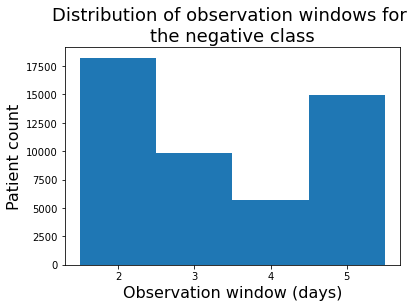

In [38]:
import numpy as np
import matplotlib.pyplot as plt
combined_neg['days_of_data'].hist(bins=np.arange(2, 7)-0.5)
plt.xlabel('Observation window (days)', fontsize=16)
plt.xticks(np.arange(2, 6), ['2', '3', '4', '5'])
plt.ylabel('Patient count', fontsize=16)
#plt.xticks(np.arange(1.5, 6.5), ['1', '2', '3', '4', '5'])
plt.title('Distribution of observation windows for \nthe negative class', fontsize=18);
plt.grid(b=None)

In [39]:
# process data for the positive label
lab_positive = pd.read_csv('../data/intermediate/positive_lab_summary_alldays.csv', header=None)
vital_positive = pd.read_csv('../data/intermediate/positive_vitalperiodic_alldays.csv', header=None)

lab_positive = cleaning_funcs.lab_process(lab_positive) 
vital_positive = cleaning_funcs.vital_process(vital_positive, '1-all')
print(len(lab_positive))
print(len(vital_positive))
combined_positive, _ = cleaning_funcs.merge_filter(lab_positive, vital_positive)
print(len(combined_positive))

2303
2314
2295


/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/zhannahakhverdyan/anaconda3/envs/predict_dialisys_need/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


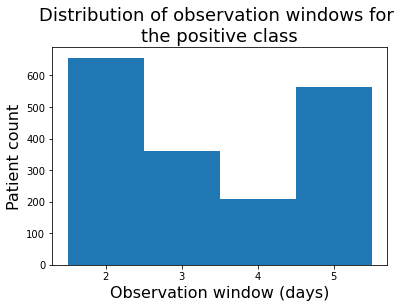

In [40]:
qa = pd.read_csv('../data/intermediate/patid_aki_label_offset.csv', header = None)
qa.columns = ['patientunitstayid', 'aki_label', 'aki_offset']
qa_pos = qa[qa.aki_label == 1]
qa_pos.set_index('patientunitstayid', inplace=True)
qa_pos.loc[(qa_pos.aki_offset/60-12 >= 24) & (qa_pos.aki_offset/60-12 <= 48), 'aki_offset_binned'] = 2
qa_pos.loc[(qa_pos.aki_offset/60-12 > 48) & (qa_pos.aki_offset/60-12 <= 72), 'aki_offset_binned'] = 3
qa_pos.loc[(qa_pos.aki_offset/60-12 > 72) & (qa_pos.aki_offset/60-12 <= 96), 'aki_offset_binned'] = 4
qa_pos.loc[qa_pos.aki_offset/60-12 > 96, 'aki_offset_binned'] = 5
qa_pos.aki_offset_binned.hist(bins=np.arange(2, 7)-0.5)
plt.xlabel('Observation window (days)', fontsize=16)
plt.xticks(np.arange(2, 6), ['2', '3', '4', '5'])
plt.ylabel('Patient count', fontsize=16)
plt.title('Distribution of observation windows for \nthe positive class', fontsize=18);
plt.grid(b=None)

In [43]:
# concatenate positive and negative class data and write to csv
combined_neg.set_index('patientunitstayid', inplace=True)
positive_negative_combined = pd.concat([combined_positive, combined_neg], axis=0)
positive_negative_combined.to_csv('../data/intermediate/lab_vital_merged_time.csv')

## Negative class windows
Given that any patients with diagnosis of within 1 day is excluded from the positive class, the negative class should also be from 2-5 days instead of 1-5 days.

In [42]:
combined_neg.head()

,patientunitstayid,min_sao2,max_sao2,mean_sao2,min_heartrate,max_heartrate,mean_heartrate,min_respiration,max_respiration,mean_respiration,...,delta_result_chloride,delta_result_creatinine,delta_result_glucose,delta_result_magnesium,delta_result_pH,delta_result_paCO2,delta_result_paO2,delta_result_platelets x 1000,delta_result_potassium,delta_result_sodium
0,141360,96.0,99.0,98.0,80.0,98.0,80.0,14.0,25.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
1,141362,90.0,96.0,93.0,98.0,112.0,98.0,13.0,34.0,13.0,...,0.0,0.00,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2,141584,95.0,100.0,97.0,82.0,98.0,82.0,14.0,22.0,14.0,...,4.0,0.09,11.0,0.0,0.10,11.0,28.0,20.0,0.5,1.0
3,141586,96.0,100.0,98.0,74.0,100.0,74.0,NaN,NaN,NaN,...,0.0,0.18,33.0,0.0,0.06,19.0,37.0,11.0,0.3,1.0
4,141675,90.0,96.0,94.5,55.0,67.0,55.0,15.0,23.6,15.0,...,0.0,0.00,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
